In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

In [2]:
def proc(rangeProfile):
    vec = rangeProfile[0::2] + rangeProfile[1::2]*(2**8)
    for i in range(len(vec)):
        if vec[i] > (2**15):
            vec[i] = vec[i] - (2**16)

    vec_cplx = vec[0::2]+1j*vec[1::2]
    return vec_cplx


In [3]:
def process(data):
    data_cplx = []
    for row in data:
        if (len(row)%2) == 1:
            data_cplx.append(proc(row[184:-3]))
        if (len(row)%2) == 0:
            data_cplx.append(proc(row[184:]))
    
    return data_cplx

def frames(data):
    # find index value
    #print(data)
    searchval = [2,1,4,3,6,5,8,7]
    N = len(searchval)
    possibles = np.where(data == searchval[0])[0]
    solns = []
    for p in possibles:
        check = data[p:p+N]
        if np.all(check == searchval):
            solns.append(p)
    # append 
    data_frame = []
    a = 0
    for i in solns:
        data_frame.append(np.array(data[a:i]))
        a = i
        
    return data_frame


In [18]:
def read_texas(filename):
    f = open(filename, "r")

    f.readline()
    lines = f.readlines()
    f.close()

    fps = float(20)
    area_start = float(0.1)
    area_end = float(2.5)

    time = lines[0::2]
    amplitude = lines[1::2]
    #print(amplitude)
 
    time_list = []
    amplitude_list = []
    
    for row in time:
        time_list.append(np.fromstring(row, dtype=float, sep=" "))
        
    for row in amplitude:
        amplitude_list.extend(np.fromstring(row, dtype=float, sep=" "))   
   
    amplitude_list = np.array(amplitude_list)
    
    time_list = np.asarray(time_list)
    time_list = time_list - time_list[0]
    #print(amplitude_list)
    
    # process raw by initial word
    data_frame = frames(amplitude_list)
    # process data to complex
    data_cplx = process(data_frame)[3::]
    
    a = len(data_cplx)
    b = len(data_cplx[1])
    print(a)
    print(b)
    teste = np.zeros((a,b), dtype = complex)
    
    for i in range(len(data_cplx)):
        row = data_cplx[i]
        for j in range(len(row)):
            teste[i,j] = complex(row[j])

    return [{"fps": fps, "area_start": area_start, "area_end": area_end}, time_list, teste]


In [41]:
filename = 'record2024-01-09_13-20-09.txt'
raw_data = read_texas(filename)
param = raw_data[0]
time = raw_data[1]
raw_radar = np.array(raw_data[2])
raw_radar.shape

1197
66


(1197, 66)

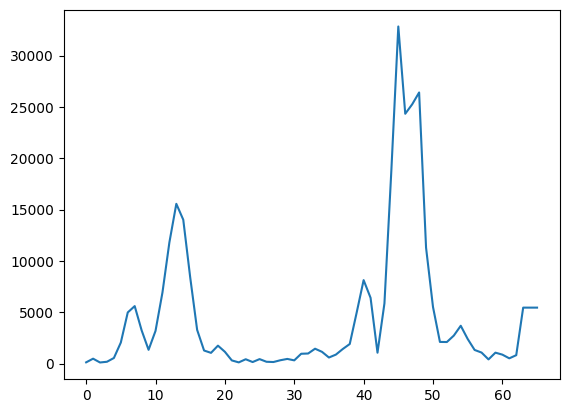

In [42]:
col1 = raw_radar[0,:]
plt.plot(abs(col1))

In [43]:
# subtract mean 
def subtractMean(data):
    hasil =data - data.mean(axis = 0, keepdims=True)
    return hasil

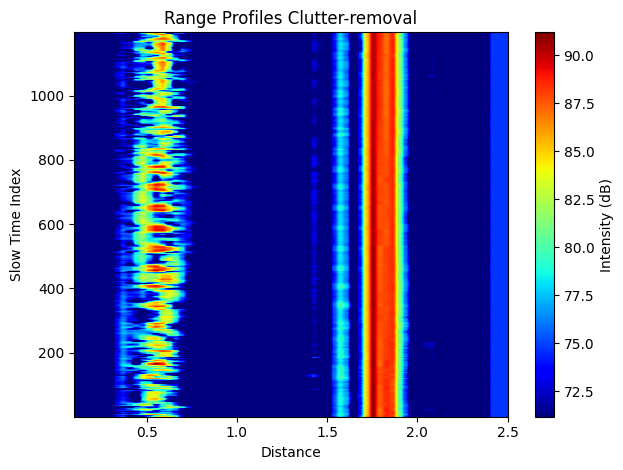

In [44]:
import matplotlib.pyplot as plt
import numpy as np
cl_rm = subtractMean(raw_radar)

# Generate distance_axis
distance_axis = np.linspace(param["area_start"], param["area_end"], raw_radar.shape[1], endpoint=True)

# Generate distance_axis
# distance_axis = np.linspace(param["area_start"], param["area_end"], dc_rm.shape[1], endpoint=True)

# Plot the range profile with distance_axis as the x-axis
plt.figure()
img = plt.imshow(
    20 * np.log10(np.abs(raw_radar)),
    cmap="jet",
    origin="lower",
    aspect="auto",
    extent=[distance_axis[0], distance_axis[-1], 1, raw_radar.shape[0]]  # Set x-axis limits using extent
)

plt.xlabel("Distance")
plt.ylabel("Slow Time Index")

# Uncomment the line below if you want to add a title
plt.title(f'Range Profiles Clutter-removal')

# Set color limits
clim = img.get_clim()
img.set_clim([clim[1] - 20, clim[1]])

# Draw and show the plot
plt.colorbar(label='Intensity (dB)')
plt.draw()
plt.tight_layout()
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_15304\1296790794.py:16: RuntimeWarning: divide by zero encountered in log10
  20 * np.log10(np.abs(cl_rm)),


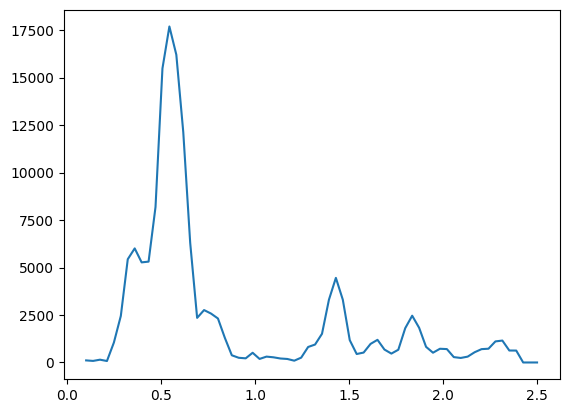

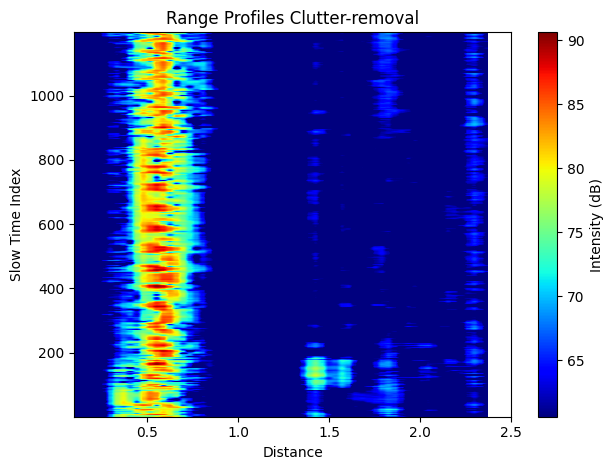

In [45]:
import matplotlib.pyplot as plt
import numpy as np
cl_rm = subtractMean(raw_radar)

# Generate distance_axis
distance_axis = np.linspace(param["area_start"], param["area_end"], cl_rm.shape[1], endpoint=True)
plt.figure(1)
plt.plot(distance_axis,abs(cl_rm[10,:]))

# Generate distance_axis
# distance_axis = np.linspace(param["area_start"], param["area_end"], dc_rm.shape[1], endpoint=True)

# Plot the range profile with distance_axis as the x-axis
plt.figure(2)
img = plt.imshow(
    20 * np.log10(np.abs(cl_rm)),
    cmap="jet",
    origin="lower",
    aspect="auto",
    extent=[distance_axis[0], distance_axis[-1], 1, cl_rm.shape[0]]  # Set x-axis limits using extent
)

plt.xlabel("Distance")
plt.ylabel("Slow Time Index")

# Uncomment the line below if you want to add a title
plt.title(f'Range Profiles Clutter-removal')

# Set color limits
clim = img.get_clim()
img.set_clim([clim[1] - 30, clim[1]])

# Draw and show the plot
plt.colorbar(label='Intensity (dB)')
plt.draw()
plt.tight_layout()
plt.show()
